## Normalización de las variables

Discutimos previamente que la magnitud o rango de valores en una variable o característica es un factor importante que debemos tener en cuenta cuando estamos construyendo modelos de aprendizaje de máquina o machine learning. Brevemente:


### La magnitud de las variables importa porque:

- Los coeficientes de regresión de los modelos lineales están influenciados directamente por la magnitud de las variables
- Las variables con mayor escala / mayor rango de valores dominan sobre aquellas con escala más pequeña / menor rango de valores .
- El descenso por gradiente convergerá mucho más rápido si todas las variables tienen rangos de valores similares.
- El escalamiento de las variables ayuda a reducir el tiempo para encontrar los vectores de soporte en las Máquinas de vectores de soporte (SVMs) 
- De igual forma, muchos de los algoritmos usan medidas de distancia entre dos puntos - por ejemplo la distancia euclidiana, KNeighbors or SVMs-  y son sensibles a la escala de las variables. Si una de las variables tiene valores grandes, entonces la distancia será influenciada de gran manera por esta variable. 
- Algunos algoritmos, como el Análisis de Componentes Principales - PCA  requieren que las variables estén centradas alrededor de 0.
- Las redes neuronales dan diferente importancia a una característica o a otra en función de la escala que tengan sus valores (además de poder suponer otras dificultades al entrenamiento)

### Los modelos de machine learning que se ven afectados por la escala de las variables son:

- Regresión Lineal y Logística 
- Redes Neuronales
- Máquinas de vectores de soporte (SVMs)
- K vecinos más cercanos (KNN o KNeighbors)
- Agrupamiento K-medias
- Análisis discriminante lineal (LDA)
- Análisis de Componentes Principales (PCA)


### Normalización de las variables


Discutimos previamente que para mejorar el desempeño de muchos algoritmos de Machine Learning, es necesario normalizar las variables de entrada al algoritmo **antes del entrenamiento del modelo**.

El escalamiento de las variables es un paso importante del pre-procesamiento de datos. Las variables pueden tener cualquier valor con diferentes escalas, y el normalizar permite estandarizar estos rangos de valores independientes.
 
Por lo tanto **normalizar**, en este contexto, significa comprimir o extender los valores de una variable para que estén en un rango definido. 

Hay varios métodos de normalización , las cuales discutiremos en esta sección: 

- Escalamiento estándar (Standard Scaler)
- Escalamiento por la media 
- Escalamiento por valores mínimo y máximo - MinMaxScaling
- Escalamiento por valor máximo - MaxAbsScaling
- Escalamiento por cuantiles y mediana - RobustScaling
- Normalización vector unitario


En este notebook discutimos el **Normalización vector unitario**.

=================================================================

## Normalización vector unitario 

La normalización vectorial es utilizada para crear variables vectoriales cuya suma sea la unidad (vector unitario)

En este contexto, un vector de variables, es un vector de orden N, compuesto por N elementos, cada uno de los cuales es una de las variables en los datos. Por lo tanto tenemos un vector de variables por cada una de las observaciones.

En esta normalización, se busca que los componentes de cada vector de variables tenga una longitud de 1, o en otras palabras, que sean un vector unitario. Por lo tanto, normalizamos/dividimos por la norma del vector de variables, para cada observación, que incluye todas las diferentes variables. 

Primero, veamos las formulación matemática y luego, ilustraremos este concepto con un ejemplo.

**Nota** en este proceso se normaliza el vector de **variables**, y no los vectores de **observaciones**. 

### Normalización vector unitario: fórmulas

Para normalizar un vector, de manera que sea un vector unitario ( longitud igual a 1) se logra dividiendo cada vector de variables ya sea por la distancia de Manhattan (Norma l1 ) o por la distancia Euclidiana del vector (norma l2):

X_escalada_l1 = X / l1(X)

X_escalada_l2 = X / l2(X)


La **Distancia Manhattan** está dada por la suma absoluta de los componentes del vector:

l1(X) = |x1| + |x2| + ... + |xn|


Mientas que la **distancia Euclidiana** está dada por la raíz cuadrada de la suma al cuadrado de los componentes del vector:

l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )


En el ejemplo anterior,  x1 es la variable 1, x2 es la variable 2, y la variable xn es la variable n. X es el conjunto de datos para una de las observaciones incluyendo todas las variables (en otras palabras una fila de nuestros datos).

**Nota** ya que la distancia euclidiana toma la distancia al cuadrado de cada componente del vector de variables, es muy sensible a los outliers or valores extremos. Por lo tanto, si nuestros datos tienen valores extremos, es mejor utilizar la normalización  l1.


### Normalización vector unitario: ejemplos

Por ejemplo, si nuestros datos tienen solo una observación, (1 fila) y 3 variables:

- número de mascotas 
- número de hijos
- edad

Dijimos que un vector de variables , está compuesto por los valores de cada una de las variables por cada observación. En este caso, con donde tenemos una sola observación,  los valores de las variables son 10, 15 y 20, y vector de variables es por lo tanto  X = [10, 15, 20]. 

Entonces:

l1(X) = 10 + 15 + 20 = 45

l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**

La distancia euclidiana siempre es menos que la distancia manhattan.


El vector normalizado de valores se calcula:

X_escalado_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]

X_escalado_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]


Scikit-learn recomienda este escalamiento para problemas de clasificación de texto o agrupamientos(clustering). 

##  En este demo

Aprenderás cómo normalizar vectores de variables utilizando los datos del Boston House Prices (Precio de casas en Boston) disponible en Scikit-learn




In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# conjunto de datos para el demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# el escalador
from sklearn.preprocessing import Normalizer

In [22]:
# cargar datos del Boston House price de sklearn
boston_dataset = load_boston()

# crea un dataframe con las variables independientes
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# añadir la variable target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
# Información acerca del conjunto de datos
# Boston House Prices: Precios de casas en Boston

# El objectivo es predecir 
# "el valor mediano de las casas en Boston" 
# esta es la columna MEDV en los datos

# el resto de las variables representan características
# acerca de las casas y de los vencidarios

#imprimir la descripción de los datos
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Cuando normalizamos vectores de variables y los convertimos en vectores unitarios, lo hacemos utlizando todas las variables, observación por observacíon,  y por lo tanto, la distancia vectorial varía por cada una de las observaciones. En este escenario, no es necesario aprender ningún parámetro o guardarlos. Ya que la normalización ocurre al nivel de observación, no es necesario dividir los datos en sets de entrenamiento y prueba.

Sin embargo, probablemente completerás esta normalización como parte de otros pasos de ingenería de variables, asi q los datos estarán separados en los dos sets, asi q continuaremos haciendo esto aquí también.

In [24]:
# separemos los datos en los sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

###  Escalando con la norma l1

In [25]:
# inicializa el escalador
scaler = Normalizer(norm='l1')

# entrena el escalador en el set de entrenamiento
# este paso NO HACE nada
scaler.fit(X_train)

# transforma los sets de entrenamiento y prueba 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# calculemos la norma para cada observación (vector de variables)
# datos originales

np.round(np.linalg.norm(X_train, ord=1, axis=1), 1)

array([1024.1,  744. , 1003.5,  858. ,  732.4,  859.3,  845.9,  847. ,
        888.1,  826.7,  705.9,  808.9,  734. ,  784.6,  785.1,  819.6,
       1212.9, 1258. ,  757.6, 1223. , 1236.1,  890.2, 1166.8, 1270. ,
        919. ,  925.9, 1197. ,  770.3, 1118. ,  886.7,  719. ,  952. ,
        933.4,  745. ,  805.6,  825.1,  678.5,  947.7,  910. ,  816. ,
        769.1,  832.4,  763.5,  777. ,  850.4, 1137.7,  802.1,  703.4,
        802.6,  688. ,  801.8,  877.3,  753.8,  912.4,  936.7,  813.6,
       1194. ,  771.9,  739.5,  825.9,  890.8,  891.6,  844.4,  927.1,
        998.6,  903.3, 1250.3,  739.5, 1095.3,  857.7,  834.8,  738.4,
        855.1, 1238.4,  828.6,  958.4,  775. ,  923.4,  859.6,  830.7,
        782.3,  796.8,  953.2,  857.9, 1249.9,  716.7,  803.9,  978.8,
       1186.9,  904. , 1238.2,  981.6,  884.9,  924.9,  694.1,  725.2,
        832.4,  717.7,  917. , 1263.9,  836.7,  813.5,  992.5,  823.4,
       1224.3,  712.1,  841.2,  950.3,  702.6,  791.9,  830.4,  742.1,
      

In [27]:
# calculemos la norma para cada observación (vector de variables)
# datos normalizados
np.round(np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Ahora, cada vector tiene una norma l1 de uno

In [28]:
# ahora transformemos los arreglos NumPy resultantes 
# en dataframes para el resto del demo
 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
# Miremos los pamámetros estadísticos principales de cada
# variable en su forma original
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.353223,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,3.103700,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [30]:
# Miremos los pamámetros estadísticos principales de cada
# variable normalizada 

X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.003022,0.014491,0.011731,0.000073,0.000620,0.007221,0.075687,0.004479,0.009336,0.427642,0.020880,0.411273,0.013544
std,0.007018,0.028764,0.006854,0.000283,0.000115,0.001620,0.029466,0.002780,0.007262,0.114922,0.003751,0.124328,0.007204
min,0.000008,0.000000,0.000577,0.000000,0.000424,0.002996,0.004348,0.000919,0.001163,0.250885,0.014363,0.000374,0.001879
25%,0.000093,0.000000,0.006243,0.000000,0.000545,0.006061,0.055411,0.002206,0.004740,0.346035,0.016876,0.318534,0.008473
50%,0.000311,0.000000,0.010421,0.000000,0.000611,0.007376,0.078917,0.003923,0.006021,0.393483,0.021129,0.456271,0.012262
75%,0.002983,0.024709,0.015120,0.000000,0.000657,0.008358,0.098186,0.006456,0.018223,0.526258,0.024014,0.498519,0.017204
max,0.066782,0.121905,0.035787,0.001422,0.001337,0.011541,0.144310,0.016269,0.028684,0.795970,0.030523,0.578661,0.041723


Los valores se han comprimido en un rango de valores más pequeño

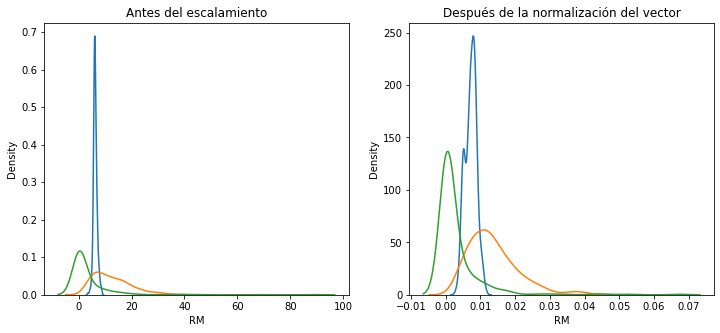

In [31]:
# comparemos la distribución de las variables 
# antes y después del escalamiento

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# antes de la normalización
ax1.set_title('Antes del escalamiento')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# después de la normalización
ax2.set_title('Después de la normalización del vector')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

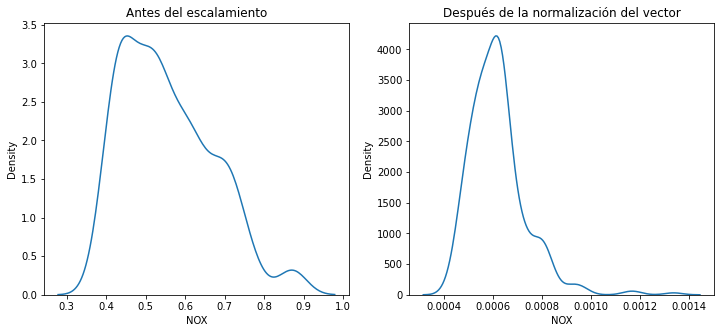

In [32]:
# comparemos la distribución de las variables 
# antes y después del escalamiento

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# antes de la normalización
ax1.set_title('Antes del escalamiento')
#sns.kdeplot(X_train['AGE'], ax=ax1)
#sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# después de la normalización
ax2.set_title('Después de la normalización del vector')
#sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
#sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

Vemos cómo la normalización cambia la distribución de la variable original considerablemente. 

###  Escalando con la norma l2

In [33]:
# inicializa el escalador
scaler = Normalizer(norm='l2')

# entrena el escalador en el set de entrenamiento
# este paso NO HACE nada
scaler.fit(X_train)

# transforma los sets de entrenamiento y prueba 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# calculemos la norma para cada observación (vector de variables)
# datos originales

np.round(np.linalg.norm(X_train, ord=2, axis=1), 1)

array([600.5, 458.4, 598. , 519.1, 434. , 511. , 527.9, 496.7, 675.2,
       496.5, 450.2, 492.1, 453.5, 492.4, 492.9, 491.5, 770.1, 782.2,
       465.2, 759.8, 778.6, 535.3, 764.4, 781.5, 561.9, 562.8, 768.1,
       468.2, 725.5, 673.1, 458.8, 572.5, 559.8, 488. , 490.2, 488.9,
       441.3, 680.4, 675.6, 483.9, 483.9, 506.2, 474.8, 481.9, 517.8,
       747.8, 503.3, 438.2, 483. , 424. , 478.8, 519.9, 451.4, 546.2,
       558.3, 516.9, 773.8, 470.4, 467.5, 501.6, 674.5, 528.1, 508.2,
       677.1, 593.2, 556.5, 781.9, 465.9, 707.6, 509.6, 501.3, 449.4,
       512.5, 778.8, 483.6, 587.7, 485.4, 558.1, 673.1, 504.6, 494.9,
       509. , 589.2, 510.6, 777. , 439.2, 478.8, 593.3, 760. , 534.5,
       779.9, 586.6, 551.3, 558.4, 446.2, 418.8, 496. , 407.8, 676.2,
       782.8, 671. , 499. , 593.6, 482.6, 779.2, 456.1, 483.4, 573.4,
       456.5, 477.3, 493.3, 485.7, 490.5, 716.1, 497.2, 760.6, 524.9,
       672.1, 488.2, 443.7, 751. , 492.5, 424.3, 458.7, 783. , 596.4,
       482.9, 557.2,

In [35]:
# calculemos la norma para cada observación (vector de variables)
# datos normalizados

np.round(np.linalg.norm(X_train_scaled, ord=2, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [36]:
# ahora transformemos los arreglos NumPy resultantes 
# en dataframes para el resto del demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [37]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.353223,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,3.103700,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [38]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.004688,0.024027,0.018758,0.000120,0.000997,0.011640,0.122166,0.007251,0.014647,0.682156,0.033589,0.668592,0.021765
std,0.011049,0.048105,0.010982,0.000463,0.000187,0.002718,0.048931,0.004588,0.010624,0.152037,0.006168,0.203917,0.011661
min,0.000013,0.000000,0.000963,0.000000,0.000681,0.004682,0.006431,0.001499,0.001911,0.425977,0.024238,0.000475,0.003099
25%,0.000148,0.000000,0.010430,0.000000,0.000883,0.009432,0.088582,0.003363,0.007875,0.565434,0.027163,0.507064,0.013486
50%,0.000515,0.000000,0.016919,0.000000,0.000979,0.012099,0.126282,0.006399,0.010027,0.639890,0.033567,0.753246,0.019929
75%,0.004750,0.041516,0.023812,0.000000,0.001060,0.013580,0.158637,0.010516,0.030581,0.850914,0.038620,0.809355,0.027524
max,0.113081,0.207644,0.061249,0.002282,0.002053,0.018156,0.237626,0.027624,0.035766,0.992514,0.053097,0.889808,0.070063


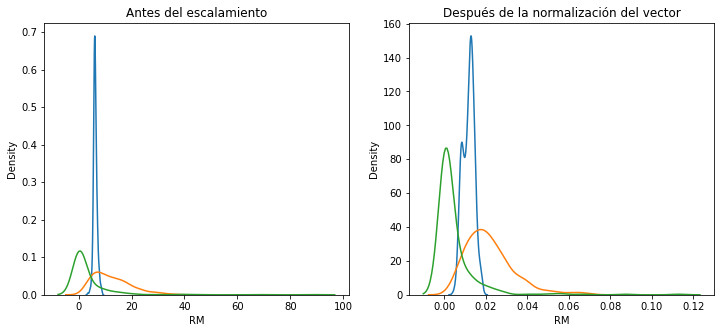

In [39]:
# comparemos la distribución de las variables 
# antes y después del escalamiento
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# antes de la normalización
ax1.set_title('Antes del escalamiento')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# después de la normalización
ax2.set_title('Después de la normalización del vector')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

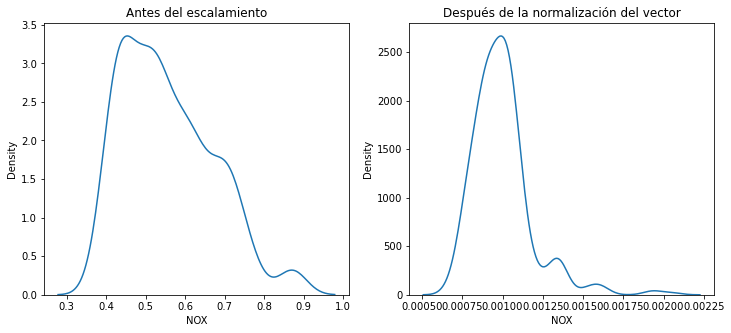

In [40]:
# comparemos la distribución de las variables 
# antes y después del escalamiento

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# antes de la normalización
ax1.set_title('Antes del escalamiento')

#sns.kdeplot(X_train['AGE'], ax=ax1)
#sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# después de la normalización
ax2.set_title('Después de la normalización del vector')
#sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
#sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()